In [2]:
import numpy as np
import torch 
import torch.nn as nn
from torch.nn import Linear
from torch.nn import functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from transformers import BertModel

e:\Python\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
class ScaledDotProductAttention(nn.Module):

    def forward(self, query, key, value, mask=None):
        dk = query.size()[-1]
        scores = query.matmul(key.transpose(-2, -1)) / math.sqrt(dk)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attention = F.softmax(scores, dim=-1)
        return attention.matmul(value)




class MultiSelfAttention(nn.Module):

    def __init__(self, heads, d_model, dropout = 0.1):
        super().__init__()
        
        self.d_model = d_model
        self.d_k = d_model // heads
        self.h = heads
        
        self.q_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(d_model, d_model)
        self.attention = ScaledDotProductAttention()
    
    def forward(self, q, k, v, mask=None):
        
        bs = q.size(0) #batch
        
        # perform linear operation and split into N heads
        k = self.k_linear(k).view(bs, -1, self.h, self.d_k)
        q = self.q_linear(q).view(bs, -1, self.h, self.d_k)
        v = self.v_linear(v).view(bs, -1, self.h, self.d_k)
        
        # transpose to get dimensions bs * N * sl * d_model
        k = k.transpose(1,2)
        q = q.transpose(1,2)
        v = v.transpose(1,2)
        
        # calculate attention using function we will define next
        scores = self.attention(q,k,v)
        # concatenate heads and put through final linear layer
        concat = scores.transpose(1,2).contiguous()\
        .view(bs, -1, self.d_model)
        output = self.out(concat)
    
        return output

NameError: name 'nn' is not defined

In [507]:
class selfattension(nn.Module):
    def __init__(self):
        super(selfattension,self).__init__()
        self.Linear1=Linear(1,5)
        self.linear2=Linear(1,5)
        self.linear3=Linear(1,1)
        

#前向传播
    def forward(self,x):
        query_matrix=self.Linear1(x)
        key_matrix=self.linear2(x)
        value_matrix=self.linear3(x)
        query_key_matrix=torch.mm(query_matrix,key_matrix.T)/torch.sqrt(torch.tensor(2))
        query_key_similaritymatrix=(torch.exp(query_key_matrix).T/torch.sum(torch.exp(query_key_matrix),axis=1)).T
        output=torch.sum(value_matrix*query_key_similaritymatrix,axis=1)
        return output

    #制造数据
def generate_data(x):
    return torch.sin(x)+torch.rand(1)

train_x=torch.linspace(0,5,200).reshape(-1,1)
train_y=generate_data(train_x)
selfattentionmodel=selfattension()

#定义损失函数,优化方法
criterion=nn.MSELoss()
optimizer=optim.Adam(selfattentionmodel.parameters(),lr=0.1)

#训练网络
for epoch in range(100):
    output=selfattentionmodel(train_x)
#计算误差
    loss=criterion(output,train_y)
    optimizer.zero_grad()
    loss.backward()
    #优化参数
    optimizer.step()
    print(loss)


tensor(1.3401, grad_fn=<MseLossBackward0>)
tensor(0.7923, grad_fn=<MseLossBackward0>)
tensor(0.5373, grad_fn=<MseLossBackward0>)
tensor(0.5281, grad_fn=<MseLossBackward0>)
tensor(0.6439, grad_fn=<MseLossBackward0>)
tensor(0.7411, grad_fn=<MseLossBackward0>)
tensor(0.7541, grad_fn=<MseLossBackward0>)
tensor(0.6975, grad_fn=<MseLossBackward0>)
tensor(0.6142, grad_fn=<MseLossBackward0>)
tensor(0.5436, grad_fn=<MseLossBackward0>)
tensor(0.5095, grad_fn=<MseLossBackward0>)
tensor(0.5156, grad_fn=<MseLossBackward0>)
tensor(0.5476, grad_fn=<MseLossBackward0>)
tensor(0.5824, grad_fn=<MseLossBackward0>)
tensor(0.6006, grad_fn=<MseLossBackward0>)
tensor(0.5952, grad_fn=<MseLossBackward0>)
tensor(0.5713, grad_fn=<MseLossBackward0>)
tensor(0.5411, grad_fn=<MseLossBackward0>)
tensor(0.5172, grad_fn=<MseLossBackward0>)
tensor(0.5074, grad_fn=<MseLossBackward0>)
tensor(0.5122, grad_fn=<MseLossBackward0>)
tensor(0.5258, grad_fn=<MseLossBackward0>)
tensor(0.5392, grad_fn=<MseLossBackward0>)
tensor(0.54

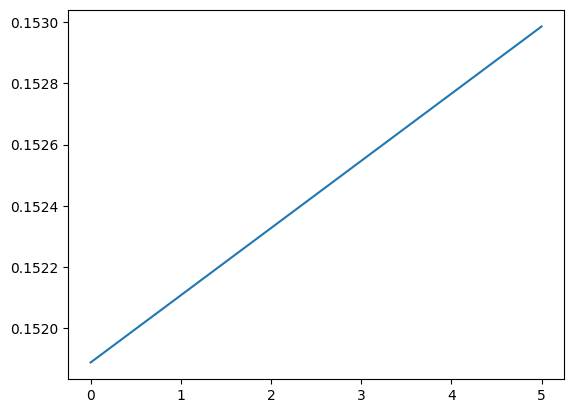

In [508]:
y_pre=selfattentionmodel(train_x)
plt.plot(train_x,y_pre.detach())

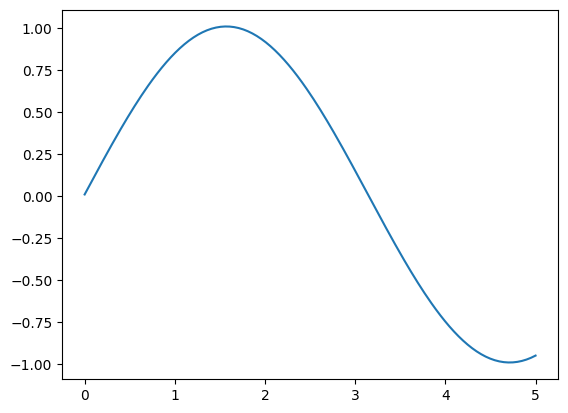

In [509]:
plt.plot(train_x,train_y)